In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [2]:
df = pd.read_csv('./creditcard.csv')
df.shape

(284807, 31)

In [3]:
df["Time"] = df["Time"].apply(lambda x : x / 3600 % 24)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,1.453795e+01,5.847061,0.000000,10.598194,15.010833,19.329722,23.999444
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
nan_mean = df.isna().mean()
nan_mean = nan_mean[nan_mean != 0].sort_values()
nan_mean

Series([], dtype: float64)

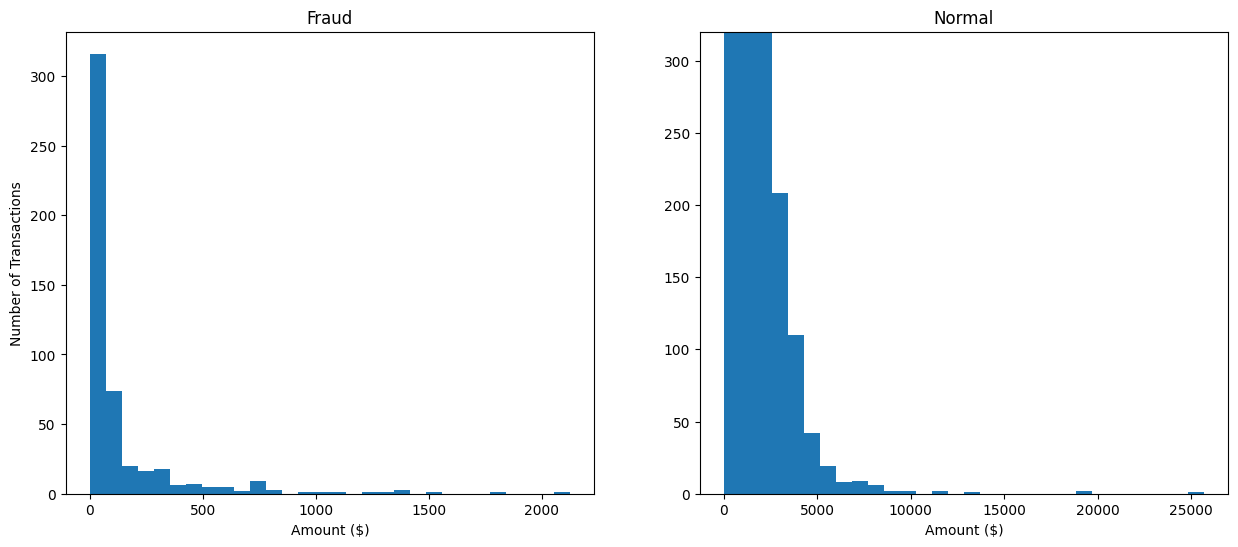

In [7]:
df_fraud = df[df['Class'] == 1]
df_ok = df[df['Class'] == 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bins = 30

ax1.hist(df_fraud['Amount'], bins=bins)
ax2.hist(df_ok['Amount'], bins=bins)

ax1.set_title('Fraud')
ax2.set_title('Normal')

ax1.set_xlabel('Amount ($)')
ax2.set_xlabel('Amount ($)')
ax1.set_ylabel('Number of Transactions')

ax2.set_ylim(0, 320)
plt.show()

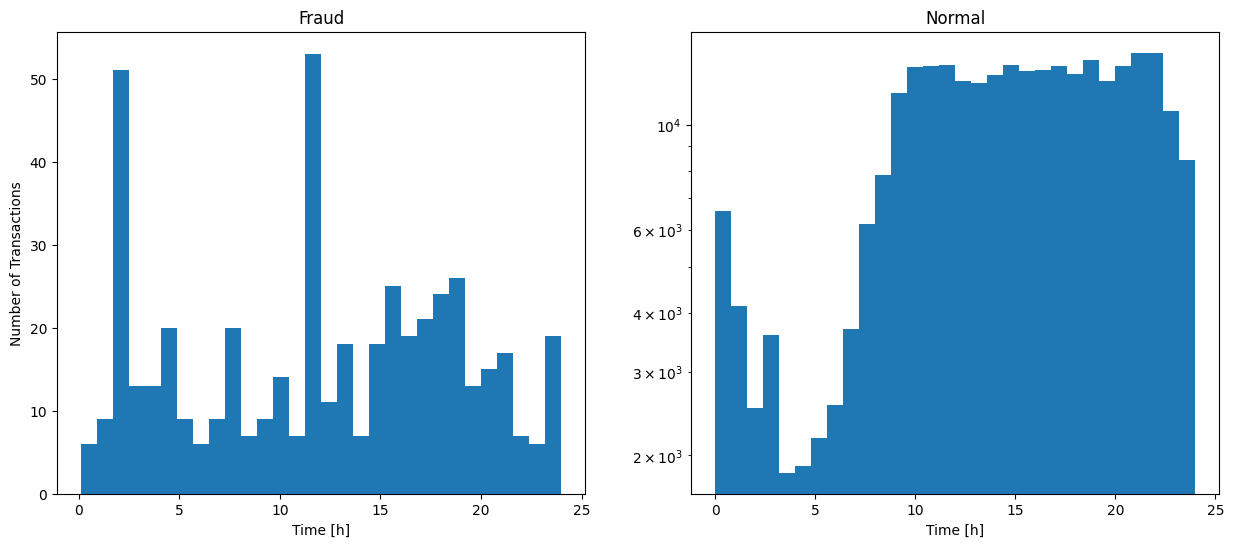

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bins = 30

ax1.hist(df_fraud['Time'], bins=bins)
ax2.hist(df_ok['Time'], bins=bins)

ax1.set_title('Fraud')
ax2.set_title('Normal')

ax1.set_xlabel('Time [h]')
ax2.set_xlabel('Time [h]')
ax1.set_ylabel('Number of Transactions')

ax2.set_yscale('log')
plt.show()

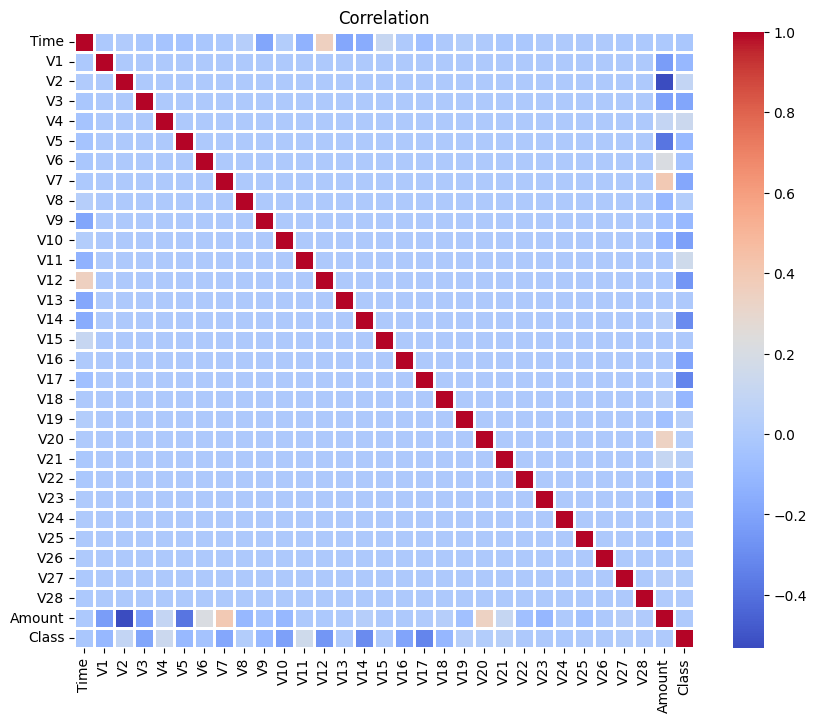

In [9]:
corr = df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = "coolwarm", linewidth = 2, linecolor = "white")
plt.title("Correlation")
plt.show()

In [10]:
ok_sample = df[df['Class'] == 0].sample(2000)
df_tsne = pd.concat([ok_sample, df_fraud]).sample(frac=1).reset_index(drop=True)

In [11]:
X_tsne = df_tsne.drop(['Class'], axis = 1).values
y_tsne = df_tsne["Class"].values

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_tsne)

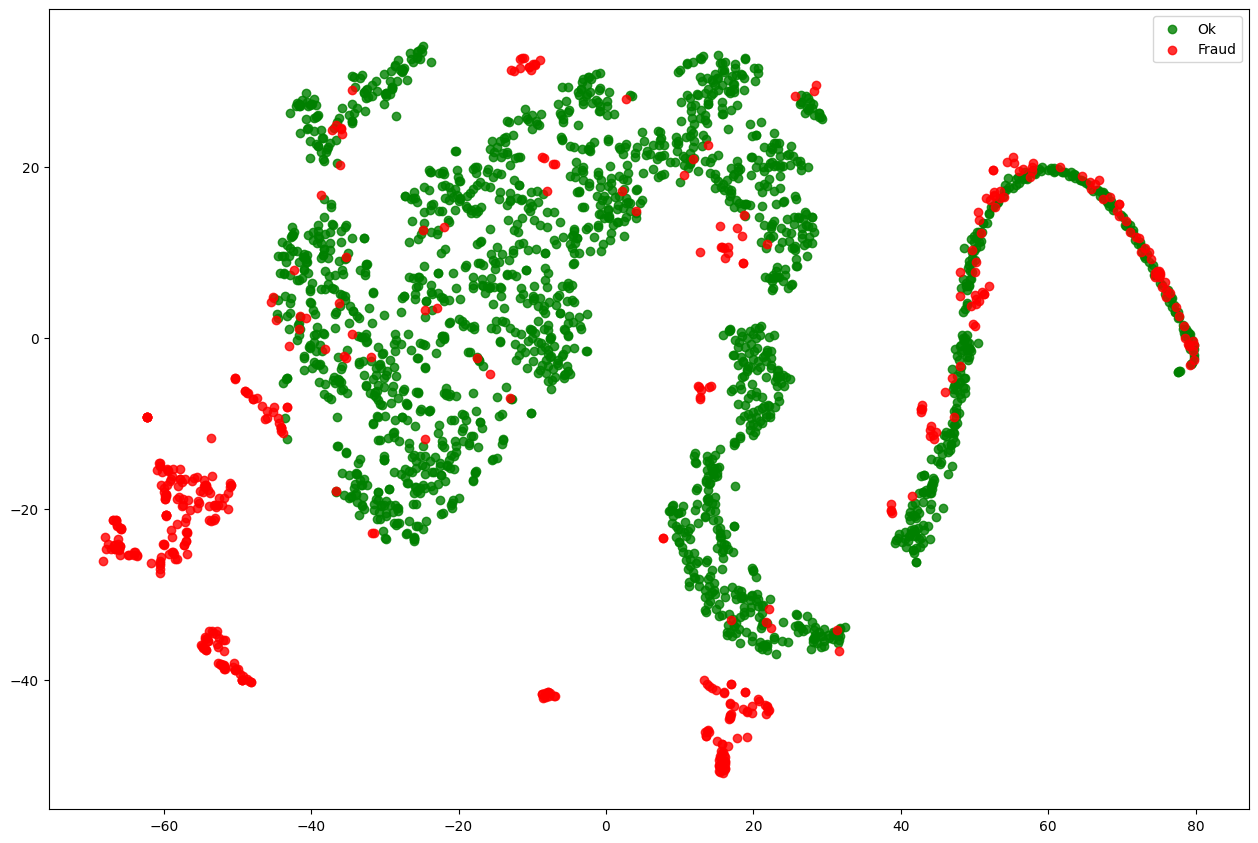

In [12]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(X_tsne[np.where(y_tsne == 0), 0], X_tsne[np.where(y_tsne == 0), 1],
           marker='o', color='g', linewidth=1, alpha=0.8, label='Ok')
ax.scatter(X_tsne[np.where(y_tsne == 1), 0], X_tsne[np.where(y_tsne == 1), 1],
           marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')
ax.legend(loc='best')

In [13]:
X = df.drop('Class', axis=1)
y = df['Class']

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape

((227845, 30), (56962, 30))

### PCA

In [15]:
scores = []
for n in range(2, 31):
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_tt = pca.transform(X_train)
    X_dt = pca.inverse_transform(X_tt)
    
    scores.append(mean_squared_error(X_train, X_dt))
scores = np.array(scores)
print(scores.argmin() + 2)

30


In [16]:
scores

array([9.53166061e-01, 8.28373955e-01, 7.47333252e-01, 6.73713074e-01,
       6.07177849e-01, 5.47126572e-01, 4.91803114e-01, 4.44255025e-01,
       4.04397275e-01, 3.64907156e-01, 3.30373626e-01, 2.97341945e-01,
       2.66336320e-01, 2.37874842e-01, 2.09904253e-01, 1.84397521e-01,
       1.59594407e-01, 1.36149106e-01, 1.13170106e-01, 9.12549337e-02,
       7.31313965e-02, 5.55431955e-02, 4.20148689e-02, 2.98008381e-02,
       2.06379461e-02, 1.28957956e-02, 7.31810510e-03, 3.47285397e-03,
       1.90363667e-27])

In [17]:
scores.argmin()

np.int64(28)

In [18]:
# n_components = 10
n_components = 10
pca = PCA(n_components=n_components)

pca.fit(X_train)

PCA(n_components=10)

#### Train Eval

In [19]:
X_tt = pca.transform(X_train)
X_dt = pca.inverse_transform(X_tt)
X_dt = pd.DataFrame(X_dt, columns=X_train.columns, index=X_train.index)

reconstruction_score = []
for idx in X_train.index:
    score = mean_squared_error(X_train.loc[idx], X_dt.loc[idx])
    reconstruction_score.append(score)
    
rc_scores = pd.DataFrame(reconstruction_score, index=X_train.index, columns=['reconstruction_score'])

rec_mean = rc_scores['reconstruction_score'].mean()
rec_median = rc_scores['reconstruction_score'].median()
rec_std = rc_scores['reconstruction_score'].std()

rc_scores = rc_scores.sort_values(by='reconstruction_score', ascending=False)

top_scores_idx = rc_scores[(rc_scores > (rec_median + 2*rec_std))].dropna().index
train_fraud_index = list(y_train[y_train == 1].index)

Text(0, 0.5, 'Number of samples')

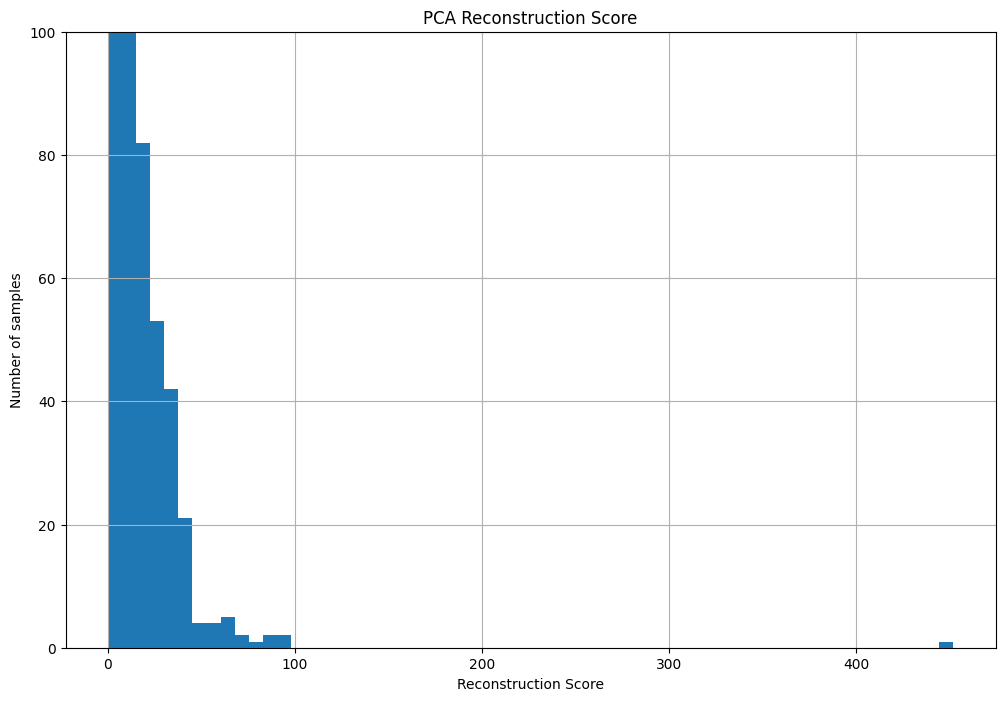

In [20]:
plt.figure(figsize=(12, 8))
rc_scores['reconstruction_score'].hist(bins=60)
plt.ylim(0, 100)
plt.title('PCA Reconstruction Score')
plt.xlabel('Reconstruction Score')
plt.ylabel('Number of samples')

In [21]:
pred = pd.DataFrame(index=X_train.index)
pred['fraud'] = 0
for x in top_scores_idx:
    pred.loc[x, 'fraud'] = 1

print(classification_report(y_train, pred['fraud']))
print('Rate of transations to investigate:', len(top_scores_idx) / len(X_train) * 100, '%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.21      0.65      0.32       394

    accuracy                           1.00    227845
   macro avg       0.60      0.82      0.66    227845
weighted avg       1.00      1.00      1.00    227845

Rate of transations to investigate: 0.5367684171256776 %


In [22]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, pred['fraud'])

np.float64(0.21013900245298447)

In [23]:
recall_score(y_train, pred['fraud'])

np.float64(0.6522842639593909)

#### Val Eval

In [24]:
X_tt = pca.transform(X_val)
X_dt = pca.inverse_transform(X_tt)
X_dt = pd.DataFrame(X_dt, columns=X_val.columns, index=X_val.index)

reconstruction_score = []
for idx in X_val.index:
    score = mean_squared_error(X_val.loc[idx], X_dt.loc[idx])
    reconstruction_score.append(score)
    
rc_scores = pd.DataFrame(reconstruction_score, index=X_val.index, columns=['reconstruction_score'])

rec_mean = rc_scores['reconstruction_score'].mean()
rec_median = rc_scores['reconstruction_score'].median()
rec_std = rc_scores['reconstruction_score'].std()

rc_scores = rc_scores.sort_values(by='reconstruction_score', ascending=False)

top_scores_idx = rc_scores[(rc_scores > (rec_median + 2*rec_std))].dropna().index
val_fraud_index = list(y_val[y_val == 1].index)

In [25]:
pred = pd.DataFrame(index=X_val.index)
pred['fraud'] = 0
for x in top_scores_idx:
    pred.loc[x, 'fraud'] = 1
    
print(classification_report(y_val, pred['fraud']))
print('Rate of transations to investigate:', len(top_scores_idx) / len(X_val) * 100, '%')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.76      0.30        98

    accuracy                           0.99     56962
   macro avg       0.59      0.87      0.65     56962
weighted avg       1.00      0.99      1.00     56962

Rate of transations to investigate: 0.7074892033285348 %


#### Tsne from pca representation

In [26]:
X_pca_tsne = pca.transform(X_train)
X_pca_tsne = pd.DataFrame(X_pca_tsne, index=X_train.index)

X_pca_tsne['Class'] = y_train
ok_sample = X_pca_tsne[X_pca_tsne['Class'] == 0].sample(2000)
df_fraud = X_pca_tsne[X_pca_tsne['Class'] == 1]
df_tsne = pd.concat([ok_sample, df_fraud]).sample(frac=1).reset_index(drop=True)

X_tsne = df_tsne.values
y_tsne = df_tsne["Class"].values

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_tsne)

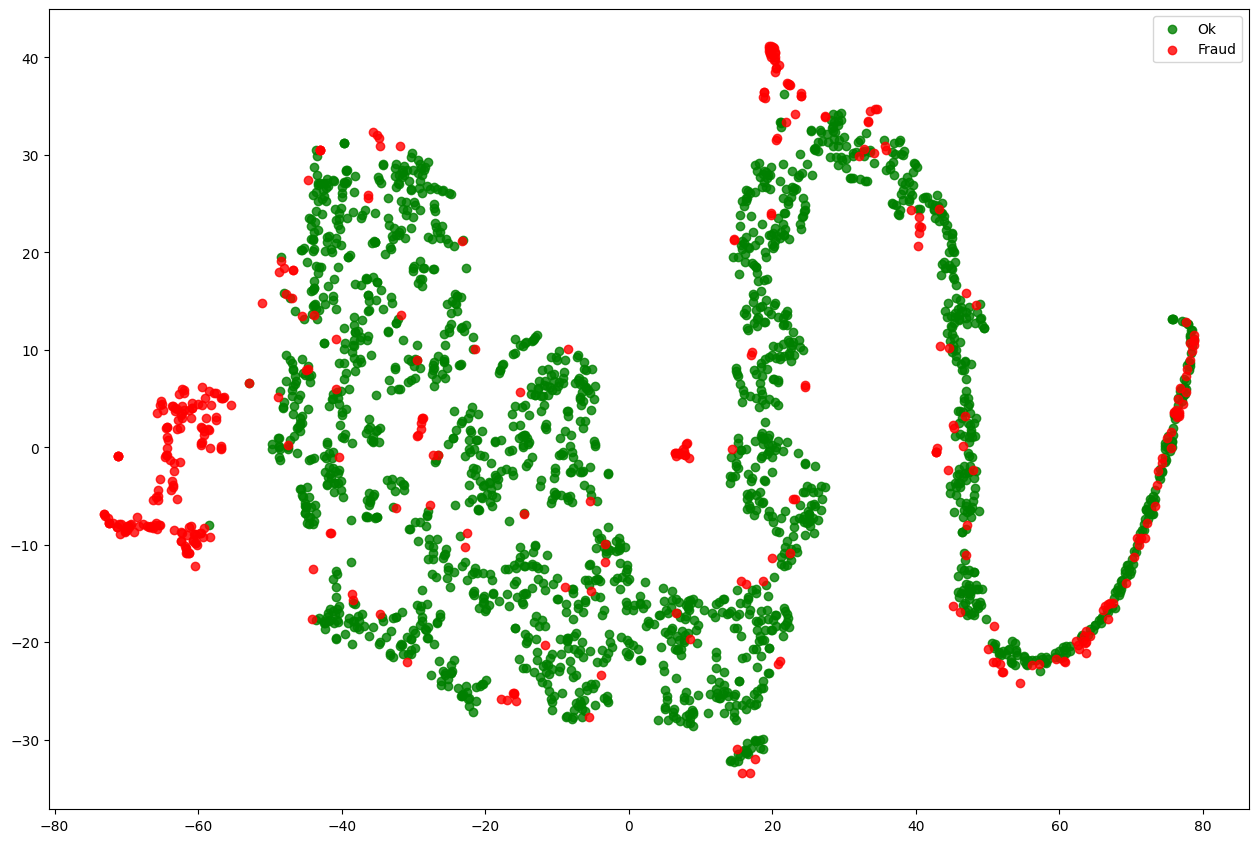

In [27]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(X_tsne[np.where(y_tsne == 0), 0], X_tsne[np.where(y_tsne == 0), 1],
           marker='o', color='g', linewidth=1, alpha=0.8, label='Ok')
ax.scatter(X_tsne[np.where(y_tsne == 1), 0], X_tsne[np.where(y_tsne == 1), 1],
           marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')
ax.legend(loc='best')